## ESERCIZIO 5

in questo esercizio abbiamo campionato con l'algoritmo di Metropolis le densità di probabilità date dal modulo quadro delle funzioni d'onda dell'atomo di idrogeno. 

l'algoritmo di metropolis soddisfa le ipotesi del teorema di markov con le condizioni:
- bilancio dettagliato: $K(x|y)p(y)=K(y|x)p(x)$
- $K(x|y)=T(x|y)A(x|y)$
        in cui:
   - $T(x|y)$ è la probabilità di transizione tentativo
   - $A(x|y)=min(1; \frac{p(x)}{p(y)})$
quindi, soddisfatte queste ipotesi, le distribuzioni di probabilità del sistema convergono alla distribuzione limite $p$ che vogliamo campionare.

nel nostro caso le ditribuzioni di probabilità $p$ che vogliamo campionare sono il modulo quadro delle funzioni d'onda dell'atomo di idrogeno (abbiamo posto il raggio di Bhor pari a 1):
- $|\psi_{1,0,0}|^2=Ne^{-2r}$
- $|\psi_{2,1,0}|^2=Nz^2e^{-r}$

e come probabilità di transizione tentativo $T(x|y)$ abbiamo usato:
- distribuzione uniforme
- ditribuzione gaussiana

abbiamo quindi fatto 4 simulazioni diverse, una per ogni funzione d'onda usando entrambe le probabilità di transizione tentativo.

prima di procedere con le simulazioni ho testato, per ognuna di esse, l'algoritmo in varie configurazioni per trovare la lunghezza adeguata del passo della transizione e il punto da cui far partire la simulazione.
- per quanto riguarda la decisione della lunghezza del passo ho applicato la regola empirica del 50%, fissando quindi il passo che restituisce un 50% di tentativi accettati.in questo modo si ottiene un compromesso tra l'eccessiva correlazione dovuta alla scelta di passi troppo brevi e la scarsa efficienza dovuta alla scelta di passi troppo lunghi.
- per quanto riguarda il punto di partenza, dopo vari tentativi, ho scelto il punto $(0,0,1)$ mettendo quindi il sistema a una distanza dall'origine pari al raggio di Bhor. la scelta di porre $z=1$ piuttosto che le altre coordinate è dovuta alla forma della $\psi_{2,1,0}$. la scelta del punto di partenza influenza molto il tempo di convergenza alla distribuzione limite che si vuole campionare, per questo motivo bisogna scegliere un punto di partenza opportuno.

fissate le condizioni, ho fatto una prima simulazione di $10^6$ step, senza misurare niente, per mettere il sistema in una posizione di partenza compatibile alla distribuzione di probabilità desiderate.

ho quindi avviato le simulazioni facendo $10^6$ passi e calcolando il raggio $r$. ho quindi diviso i risultati in $10^3$ blocchi.
anche la scelta del numero di blocchi è importante in quanto i risultati sono estremamente correlati, quindi ho fatto varie prove fino a che i risultati dati dalle medie a blocchi mi sono sembrati poco correlati tra loro.

ho infine calcolato la media progressiva di $r$ all'aumentare del numero di blocchi considerati e il relativo errore. 
sotto ho riportato i grafici a riguardo con il relativo valore atteso.

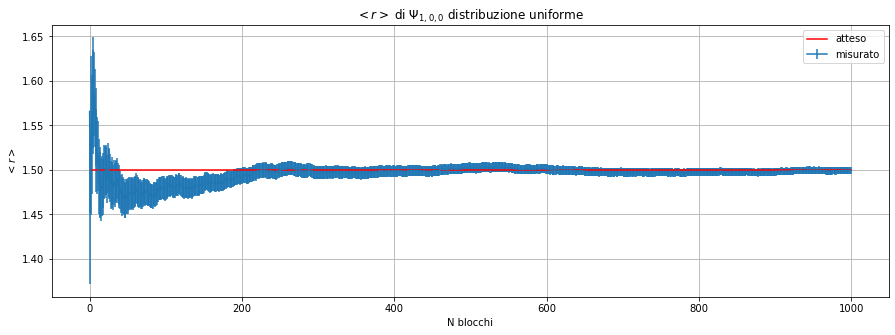

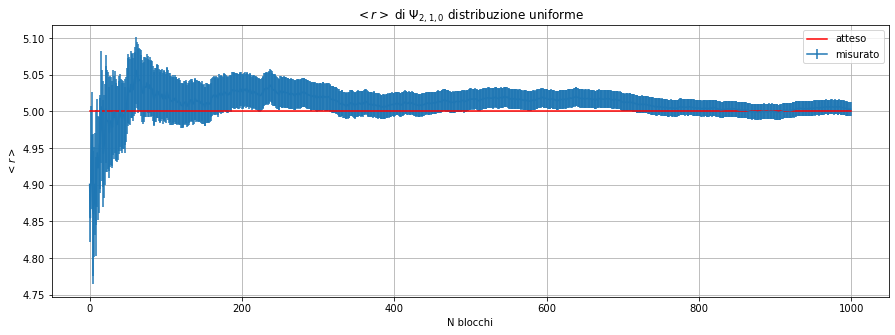

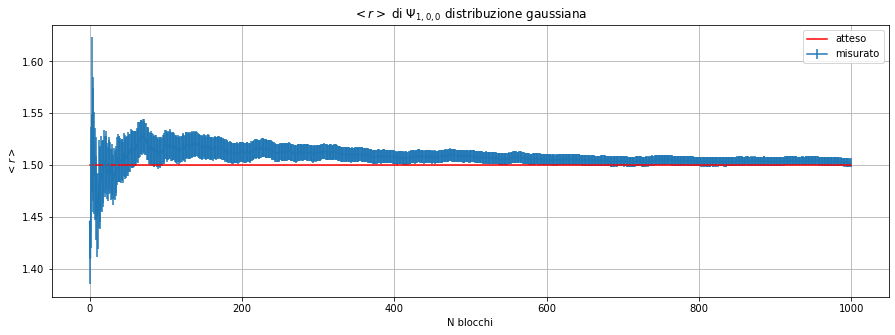

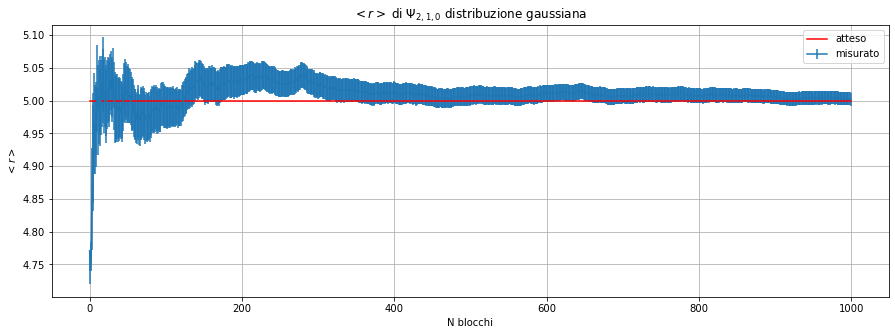

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

r_unif_1=np.loadtxt("r_unif_phi1")
r_unif_2=np.loadtxt("r_unif_phi2")
r_gauss_1=np.loadtxt("r_gauss_phi1")
r_gauss_2=np.loadtxt("r_gauss_phi2")
var_unif_1=np.loadtxt("var_unif_phi1")
var_unif_2=np.loadtxt("var_unif_phi2")
var_gauss_1=np.loadtxt("var_gauss_phi1")
var_gauss_2=np.loadtxt("var_gauss_phi2")

x=np.arange(0, len(r_unif_1),1)
att_1=np.zeros(len(r_unif_1))+1.5
att_2=np.zeros(len(r_unif_1))+5.

fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.errorbar(x,r_unif_1,yerr=var_unif_1**0.5, label="misurato")
plt.plot(x,att_1,color="red", label="atteso")
plt.xlabel('N blocchi')
plt.ylabel("$<r>$")
plt.grid(True)
plt.legend()
plt.title("$<r>$ di $\Psi_{1,0,0}$ distribuzione uniforme")
plt.show()

fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.errorbar(x,r_unif_2,yerr=var_unif_2**0.5, label="misurato")
plt.plot(x,att_2,color="red", label="atteso")
plt.xlabel('N blocchi')
plt.ylabel("$<r>$")
plt.grid(True)
plt.legend()
plt.title("$<r>$ di $\Psi_{2,1,0}$ distribuzione uniforme")
plt.show()

fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.errorbar(x,r_gauss_1,yerr=var_gauss_1**0.5, label="misurato")
plt.plot(x,att_1,color="red", label="atteso")
plt.xlabel('N blocchi')
plt.ylabel("$<r>$")
plt.grid(True)
plt.legend()
plt.title("$<r>$ di $\Psi_{1,0,0}$ distribuzione gaussiana")
plt.show()

fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.errorbar(x,r_gauss_2,yerr=var_gauss_2**0.5, label="misurato")
plt.plot(x,att_2,color="red", label="atteso")
plt.xlabel('N blocchi')
plt.ylabel("$<r>$")
plt.grid(True)
plt.legend()
plt.title("$<r>$ di $\Psi_{2,1,0}$ distribuzione gaussiana")
plt.show()

inoltre ho fatto gli scatter plot delle posizioni raggiunte durante la simulazione. ho campionato una posizione ogni $100$ durante la simulazione di $10^6$ step 

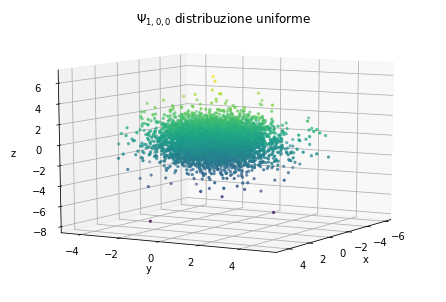

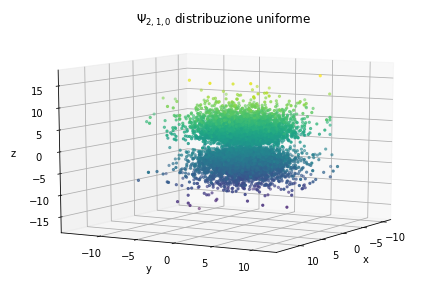

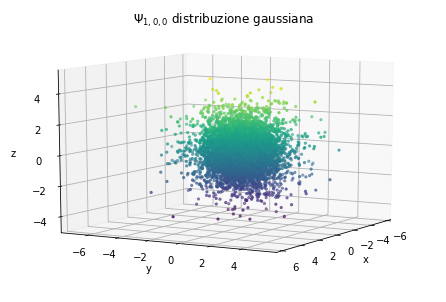

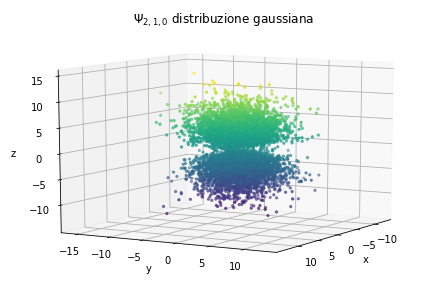

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


x=np.loadtxt("x_unif_1")
y=np.loadtxt("y_unif_1")
z=np.loadtxt("z_unif_1")

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("$\Psi_{1,0,0}$ distribuzione uniforme")
plt.show()

x=np.loadtxt("x_unif_2")
y=np.loadtxt("y_unif_2")
z=np.loadtxt("z_unif_2")

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("$\Psi_{2,1,0}$ distribuzione uniforme")
plt.show()

x=np.loadtxt("x_gauss_1")
y=np.loadtxt("y_gauss_1")
z=np.loadtxt("z_gauss_1")

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("$\Psi_{1,0,0}$ distribuzione gaussiana")
plt.show()

x=np.loadtxt("x_gauss_2")
y=np.loadtxt("y_gauss_2")
z=np.loadtxt("z_gauss_2")

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("$\Psi_{2,1,0}$ distribuzione gaussiana")
plt.show()
